# Handling Exceptions (Manejo de excepciones)
Con una serie de ejemplos veremos como manejar las excepciones.


In [1]:
def divideMe(a,b):
    c = a/b   # critical statement
    print(c)
    return

a=5
b=3 # caso normal
divideMe(a,b)
print("bye")

1.6666666666666667
bye


In [3]:
b=0
divideMe(a,b)
print("bye")

ZeroDivisionError: ignored

```try--except block```
Que tal si queremos trabajar despues de la excepcion.

In [4]:
def divideMe(a,b):
    try: # tratamos de hacer la division
        c = a/b  # critical statement
        print(c)
        return
    except Exception:
        print("you are trying to divide a number by 0 and this is not allowed")
        return

a=5
b=0 # critical number
divideMe(a,b)
print("bye") # this should get executed



you are trying to divide a number by 0 and this is not allowed
bye


In [5]:
b=5
divideMe(a,b)

1.0


Quisieramos saber cual es el mensaje de error que produce una excepcion determinada. Este se aloja en variable como un argumento para el metodo ```exception```.

In [6]:
def divideMe(a,b):
    try:  # tratamos de dividir
        c = a/b
        print(c)
    except Exception as er:   # er es error que define el sistema
        print(er)
        return
    return

a=5
b=0
divideMe(a,b)
print("bye")

division by zero
bye


En la practica nosotros no queremos escribir "bye" sino tal abrir y/o cerrar achivos y otros recursos.  Consideremos el caso de abrir un archivo dentro del bloque de ```try```. La cuestion es que archivo que se abre, archivo que se cierra. Veamos un ejemplo en ```python``` donde nos metemos en la tarea de abrir y cerrar archivos, aunque realmente no estamos abriendo y cerrando sino simulando que se abren y se cierran con ```print``` statements.

In [7]:
def divideMe(a,b):
    try:
        print("abrimos un archivo") # sumulamos que abrimos un archivo
        c = a/b
        # ....
        print("cerramos el archivo luego de hacer algun trabajo")
    except Exception as er:
        print(er)
    return

a=5
b=3
divideMe(a,b)
print("bye")


abrimos un archivo
cerramos el archivo luego de hacer algun trabajo
bye


In [9]:
# que pasa si b=0 ?
b=0
divideMe(a,b)
print("bye")

abrimos un archivo
division by zero
bye


El archivo se abrio pero no se cerro. Como hacemos?
```try--except--else``` blocks
El else ocurre cuando no hay excepcion. Si no hay excepcion el archivo que se abrio debe cerrarse

In [15]:
def divideMe(a,b):
    try:
        print("abrimos un archivo") # simulacion
        c=a/b
    except Exception as er:
        print(er)
    print("quiero seguir trabajando")
    print("cerramos el archivo")
    return

a=5
b=0
divideMe(a,b)
print("bye")

abrimos un archivo
division by zero
quiero seguir trabajando
cerramos el archivo
bye


In [13]:
a=5
b=4
divideMe(a,b)

abrimos un archivo
quiero seguir trabajando


In [16]:
b=0
divideMe(a,b)

abrimos un archivo
division by zero
quiero seguir trabajando
cerramos el archivo


In [21]:
def divideMe(a,b):
    try:
        print("abrimos un archivo")
        c = a/b
    except Exception as er:
        print(er)
        print("cerramos el archivo")
    else: print("cerramos el archivo luego de hacer algun trabajo")
    return

a=5
b=0
divideMe(a,b)
print("bye")


abrimos un archivo
division by zero
cerramos el archivo
bye


In [22]:
b=3
divideMe(a,b)


abrimos un archivo
cerramos el archivo luego de hacer algun trabajo


La ultima rama es que queremos escribir un bloque se ejecute igual si hay o no hay excepcion.
Este hace con la instruccion
```try--except--else--finally``` block

In [24]:
def divideMe(a,b):
    try:
        print("abrimos un archivo")
        c = a/b
    except Exception as er:
        print(er)
    else:
        print("cerramos el archivo luego de algun trabajo")
    finally:
        print("hacemos esto de cualquier forma. Se ejecuta siempre")
        print("for ejemplo puedo cerrar el archivo aca")
    return

a=5
b=0
divideMe(a,b)
print("bye")

abrimos un archivo
division by zero
hacemos esto de cualquier forma. Se ejecuta siempre
for ejemplo puedo cerrar el archivo aca
bye


In [25]:
a=5
b=2
divideMe(a,b)
print("bye")

abrimos un archivo
cerramos el archivo luego de algun trabajo
hacemos esto de cualquier forma. Se ejecuta siempre
for ejemplo puedo cerrar el archivo aca
bye


In [46]:
import math
def divideMe(a,b):
    try:
        print("abrimos un archivo")
        c = a/b
        d = math.sqrt(a)
        print("se ejecuto d?")
        # 1000 lineas y no sabe cual le va a generar la exception
    except Exception as er:
        print(er)
    else:  # solo cuando quiero ejecutar un bloque, solo si no hubo excepcion
        print("no hubo excepcion")
        print("cerramos el archivo")
    finally:
        print("hacemos esto de cualquier forma. Se ejecuta siempre")
        print("for ejemplo puedo cerrar el archivo aca")
    return

a=-1
b=0
divideMe(a,b)
print("bye")

abrimos un archivo
division by zero
hacemos esto de cualquier forma. Se ejecuta siempre
for ejemplo puedo cerrar el archivo aca
bye


In [47]:
b=5
a=-1
divideMe(a,b)

abrimos un archivo
math domain error
hacemos esto de cualquier forma. Se ejecuta siempre
for ejemplo puedo cerrar el archivo aca


Una forma de atacar el problema de cerrar un archivo varias veces es mediante el uso de banderas "flags"

In [40]:
from numpy import divide
def divideMe(a,b):
    flagOpen = 0
    try:
        print("abrimos el archivo")
        flagOpen=1
        c = a/b
    except Exception as er:
        print(er)
    else:
        if flagOpen:
            print("cerramos el archivo")
            flagOpen=0
    finally:
        print("esto se hace si o si")
        if flagOpen:
            print("cerramos el archivo")
            flagOpen=0

    return

a=5
b=1
divideMe(a,b)
print("bye")

abrimos el archivo
cerramos el archivo
esto se hace si o si
bye


In [41]:
b=0
divideMe(a,b)
print("bye")

abrimos el archivo
division by zero
esto se hace si o si
cerramos el archivo
bye


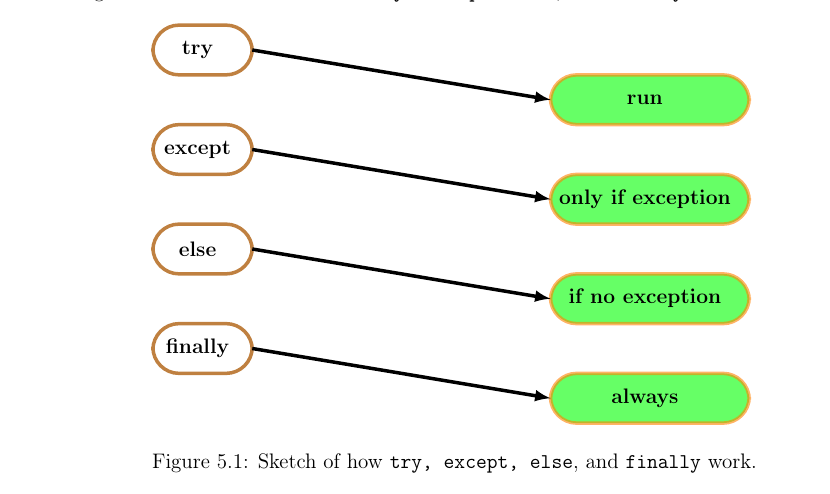

# Assertions
El "statement assert". no es exactamente una excepcion pero esta relacionada. Es un "sanity check" (curarse en salud) que avisa
de errores que se pueden presentar. La sintaxis del assert

```assert Expression[, Arguments]```

Notas acerca de assertions

* El ```assert``` retorna una variable booleana. True o False
* Tiene un mensaje opcional que puede usar para depurar errores.
* Puede usarlo para chequear tipos o valores o retornos de funciones matematicas, etc.

Veamos un ejemplo de uso del ```assert```.



In [42]:
def avg(speeds): # speeds es una lista
    n = len(speeds)
    assert n != 0
    return sum(speeds)/n

vels = []
print("Promedio de las velocidades es", avg(vels))

AssertionError: ignored

In [43]:
def avg(speeds):
    n = len(speeds)
    assert n != 0 ,  "La lista de velocidades 'speeds' no puede ser vacia"
    return sum(speeds)/n

In [44]:
vels1 = [1,3, 5, 7]
vels2 = []
print("promedio de velocidad es", avg(vels1))
print("promedio de velocidad es", avg(vels2))

promedio de velocidad es 4.0


AssertionError: ignored

In [61]:
def avg(speeds):
    n = len(speeds)
    try:
        assert n !=0, "lista no puede ser vacia"
    except AssertionError as er:
        # print(f"assertion error ocurred {er}")
        print(f"mensaje  {er}")
        dir(er)
        print(type(er))
    return
print("promedio de velocidad es", avg(vels2))




mensaje  lista no puede ser vacia
<class 'AssertionError'>
promedio de velocidad es None
